In [1]:
source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/libraries_analysis.R')
source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/libraries_visuals.R')
source("/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/R_functions/cdr3_functions.R")


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:data.table’:

    between, first, last


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union



Attache Paket: ‘tidyr’


Das folgende Objekt ist maskiert ‘package:magrittr’:

    extract



Attache Paket: ‘arrow’


Das folgende Objekt ist maskiert ‘package:magrittr’:

    is_in


Das folgende Objekt ist maskiert ‘package:utils’:

    timestamp


Lade nötiges Paket: ggplot2

Lade nötiges Paket: lattice

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“‘/etc/localtime’ is not identical to any known timezone file”

Attache Paket: ‘reshape2’


Das folgende Objekt ist maskiert ‘package:tidyr’:

    smiths


Die folgenden Objekte sind maskiert von ‘package:data.table’:

### CDR3 preprocessing, considering leaving original Counts to measure clonality

In [2]:
test <- read_parquet('/work_ikmb/sukmb667/projects/cdr3-qtl/TCellData/IBD_CDR3_QTL/IBD_TCR_REP/sample_1.parquet')

In [3]:
colnames(test)

[1] "nucleotide"                             
 [2] "aminoAcid"                              
 [3] "copy"                                   
 [4] "copyNormalized"                         
 [5] "count"                                  
 [6] "frequency"                              
 [7] "frequencyNormalized"                    
 [8] "frequencyCount"                         
 [9] "cdr3Length"                             
[10] "vFamilyName"                            
[11] "vGeneName"                              
[12] "vGeneAllele"                            
[13] "vFamilyTies"                            
[14] "vGeneNameTies"                          
[15] "vGeneAlleleTies"                        
[16] "dFamilyName"                            
[17] "dGeneName"                              
[18] "dGeneAllele"                            
[19] "dFamilyTies"                            
[20] "dGeneNameTies"                          
[21] "dGeneAlleleTies"                        
[22] "jFamilyName"                            
[23] "jGeneName"                              
[24] "jGeneAllele"                            
[25] "jFamilyTies"                            
[26] "jGeneNameTies"                          
[27] "jGeneAlleleTies"                        
[28] "vDeletion"                              
[29] "d5Deletion"                             
[30] "d3Deletion"                             
[31] "jDeletion"                              
[32] "n2Insertion"                            
[33] "n1Insertion"                            
[34] "vIndex"                                 
[35] "n2Index"                                
[36] "dIndex"                                 
[37] "n1Index"                                
[38] "jIndex"                                 
[39] "vdNormalizationFactor"                  
[40] "jNormalizationFactor"                   
[41] "inputTemplateEstimate"                  
[42] "frequencyInputTemplateEstimate"         
[43] "sequenceStatus"                         
[44] "vMaxResolved"                           
[45] "d2MaxResolved"                          
[46] "dMaxResolved"                           
[47] "jMaxResolved"                           
[48] "cloneResolved"                          
[49] "d2FamilyName"                           
[50] "d2GeneName"                             
[51] "d2GeneAllele"                           
[52] "d2FamilyTies"                           
[53] "d2GeneNameTies"                         
[54] "d2GeneAlleleTies"                       
[55] "vScore"                                 
[56] "dScore"                                 
[57] "jScore"                                 
[58] "vAlignLength"                           
[59] "vAlignSubstitutionCount"                
[60] "dAlignLength"                           
[61] "dAlignSubstitutionCount"                
[62] "jAlignLength"                           
[63] "jAlignSubstitutionCount"                
[64] "vOrphon"                                
[65] "dOrphon"                                
[66] "jOrphon"                                
[67] "vFunction"                              
[68] "dFunction"                              
[69] "jFunction"                              
[70] "vAlignSubstitutionIndexes"              
[71] "dAlignSubstitutionIndexes"              
[72] "jAlignSubstitutionIndexes"              
[73] "vAlignSubstitutionGeneThreePrimeIndexes"
[74] "dAlignSubstitutionGeneThreePrimeIndexes"
[75] "jAlignSubstitutionGeneThreePrimeIndexes"
[76] "overlapCount"                           
[77] "overlapCountReads"                      
[78] "locus"                                  
[79] "cloneProbability"                       
[80] "sequenceTags"                           
[81] "ndnMutationWeight"                      
[82] "maxAdjustedMutations"                   
[83] "diseaseLoadMultiplier"                  
[84] "cellularSensitivityBin"                 
[85] "cellFreeSensitivityBin"                 
[86] "

In [12]:
head(setorder(test[, c('sequenceStatus', 'aminoAcid', 'copy', 'copyNormalized', 'count', 'frequency', 'frequencyNormalized','frequencyCount')], -frequencyCount))

sequenceStatus,aminoAcid,copy,copyNormalized,count,frequency,frequencyNormalized,frequencyCount
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
In,CATSDLRQTEQYF,48327,39473,2661,3.1685577,2.5438043,2.3125456
In,CASSSGDNSPLHF,9274,12419,852,0.6080494,0.8003320,0.7404317
Out,NA,9759,10985,730,0.6398484,0.7079191,0.6344075
In,CASSLRSGGFTGELFF,7933,8900,661,0.5201268,0.5735530,0.5744429
Out,NA,7121,6425,450,0.4668881,0.4140537,0.3910731
Out,NA,2692,3693,257,0.2290184,0.2767232,0.2555011


In [ ]:
path_healthy <- '/work_ikmb/sukmb667/projects/cdr3-qtl/TRB_samples//raw_data/'
path_ibd <- '/work_ikmb/sukmb667/projects/cdr3-qtl/TCellData//IBD_CDR3_QTL/IBD_TCR_REP/'
path_out <- '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/cdr3/minimal_preprocessed/'
seq_depth <- 30000 # this threshold is used to remove low depth repertoires,
# which are not suitable for further analysis

if (!file.exists(path_out)) {
        dir.create(path_out, recursive = TRUE)
        }

In [ ]:
# During the preprocessing, we performed:
# 1) After excluding V and J genes from CDR3 region, CDR3 data was 
# ‘pivoted’ into long format , meaning that each sequence of CDR3 was 
# separated into separate amino acid with exact position and relative 
# frequency value. 
# 2) 

In [26]:
# This script is used to preprocess the CDR3 data from healthy and IBD samples
for (f in list.files(path_healthy)[523:length(list.files(path_healthy))]){ # to skip already processed files
    path <- paste0(path_healthy,f)
    sample_id <- paste0('H', unlist(strsplit(unlist(strsplit(f, '_'))[[2]], '\\.'))[[1]])
    cdr3_dt <- as.data.table(read_parquet(path)) 
    if (nrow(cdr3_dt) >= seq_depth){   # to remove low depth reprtoires
        cdr3_dt_minimal_preproccesing(cdr3_dt, sample_id, path_out)
    }

}

for (f in list.files(path_ibd)){
    path <- paste0(path_ibd,f)
    sample_id <- paste0('I', unlist(strsplit(unlist(strsplit(f, '_'))[[2]], '\\.'))[[1]])
    cdr3_dt <- as.data.table(read_parquet(path)) 
    if (nrow(cdr3_dt) >= seq_depth){ # to remove low depth reprtoires
        cdr3_dt_minimal_preproccesing(cdr3_dt, sample_id, path_out)
    }

}

In [3]:
test <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/cdr3/minimal_preprocessed/H1.tsv')

### CDR3 Gini-Simpson and Richness

In [8]:
cdr3_summary <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/summary_cdr3_dt.tsv')[total_number_of_seq >= 30000]
phenotypes <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/phenotypes.tsv')
cdr3_summary <- merge(cdr3_summary, phenotypes, by = 'patient_id', all.x = FALSE)

In [5]:
head(cdr3_summary[group == 'CD'] %>% arrange(n_unique))

patient_id,total_number_of_seq,productive_CDR3,n_unique,group
<chr>,<int>,<int>,<int>,<chr>
I1213,317,255,255,CD
I342,1677,1390,1380,CD
I771,3198,2553,2539,CD
I1162,2909,2584,2564,CD
I532,3704,2931,2879,CD
I376,3585,2974,2950,CD


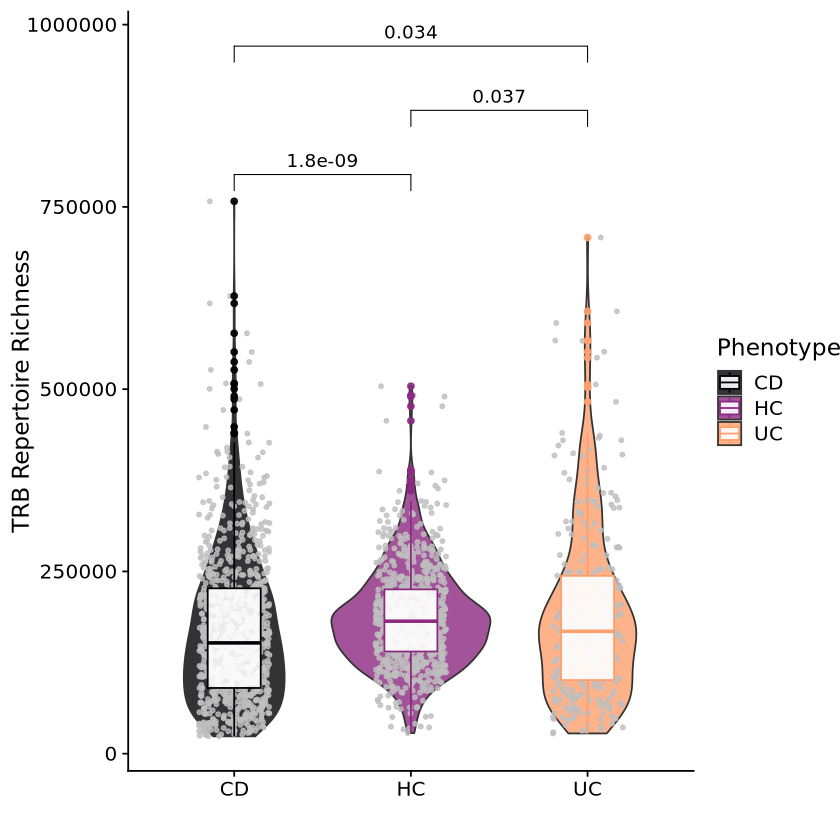

In [9]:
pl1 <- ggplot(cdr3_summary, aes(y = n_unique, x = group)) +
  geom_violin(aes( fill = group), alpha = 0.8) +
  stat_compare_means(aes(y = n_unique, x = group), method = "wilcox.test", 
            label = "p.format", 
            comparisons = list(c("CD", "HC"), 
                              c("HC", "UC"),
                              c("CD", "UC"))) + 
  geom_jitter(width = 0.2, alpha = 0.8, size = 1, color = 'grey') +
  stat_boxplot(aes(y = n_unique, x = group, color = group), width = 0.3, alpha = 0.9) + 
  scale_fill_viridis_d(option = "magma", end = 0.8) +
  scale_color_viridis_d(option = "magma", end = 0.8) +

  labs(fill = 'Phenotype', color = 'Phenotype',
       x = ' ',
       y = 'TRB Repertoire Richness') +
  theme_cowplot() 
print(pl1)

In [10]:
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/richness.pdf',
       pl1, width = 8, height = 6, units = 'in', dpi = 600)
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/richness.png',
       pl1, width = 8, height = 6, units = 'in', dpi = 600)

In [3]:
gini_simpson_results <- data.table(matrix(ncol = 2, nrow = 0))
colnames(gini_simpson_results) <- c('patient_id', 'gini_simpson')

In [ ]:
for (f in list.files('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/minimal_preprocessed/', full.names = TRUE)) {
  tmp <- read_parquet(f)
  tmp <- tmp[, .(patient_id, amino_acid, cum_expansion_freq)]
  gini_simpson_index <- GiniSimpson(as.factor(tmp$cum_expansion_freq))
  gini_simpson_results <- rbind(gini_simpson_results, 
    data.table(patient_id = tmp$patient_id[1], gini_simpson = gini_simpson_index))
}

In [ ]:
gini_simpson_results <- merge(gini_simpson_results, phenotypes, by = 'patient_id', all.x = TRUE)

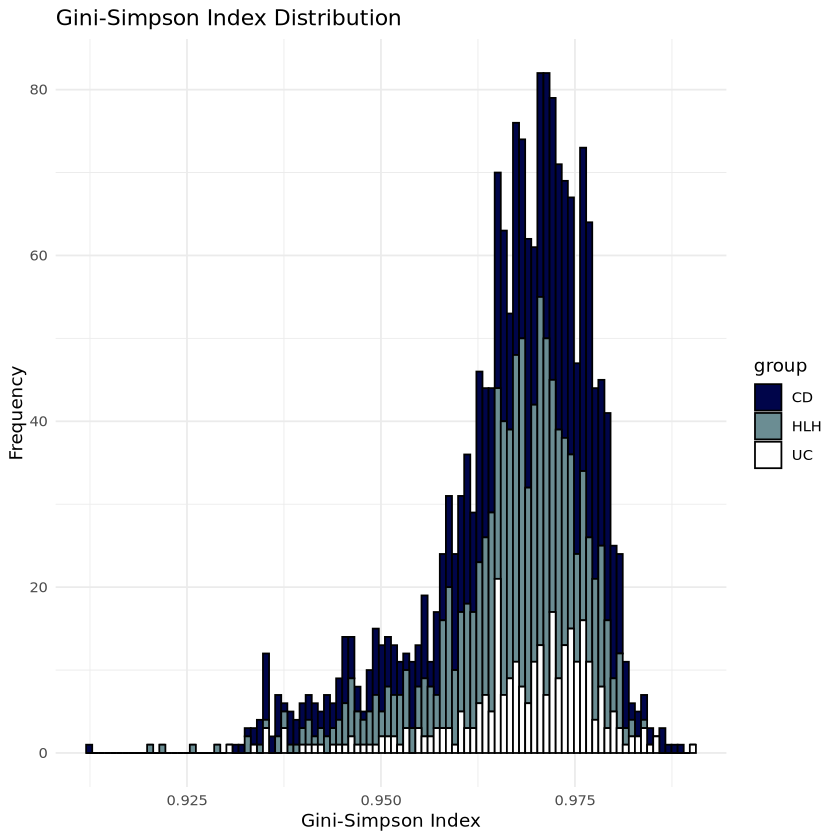

In [15]:
pl <- ggplot(gini_simpson_results, aes(x = gini_simpson, fill = group)) +
  geom_histogram(bins = 100, color = 'black') +
  scale_fill_scico_d(palette = 'davos') +
  labs(title = 'Gini-Simpson Index Distribution',
       x = 'Gini-Simpson Index',
       y = 'Frequency') +
  theme_minimal()
print(pl)

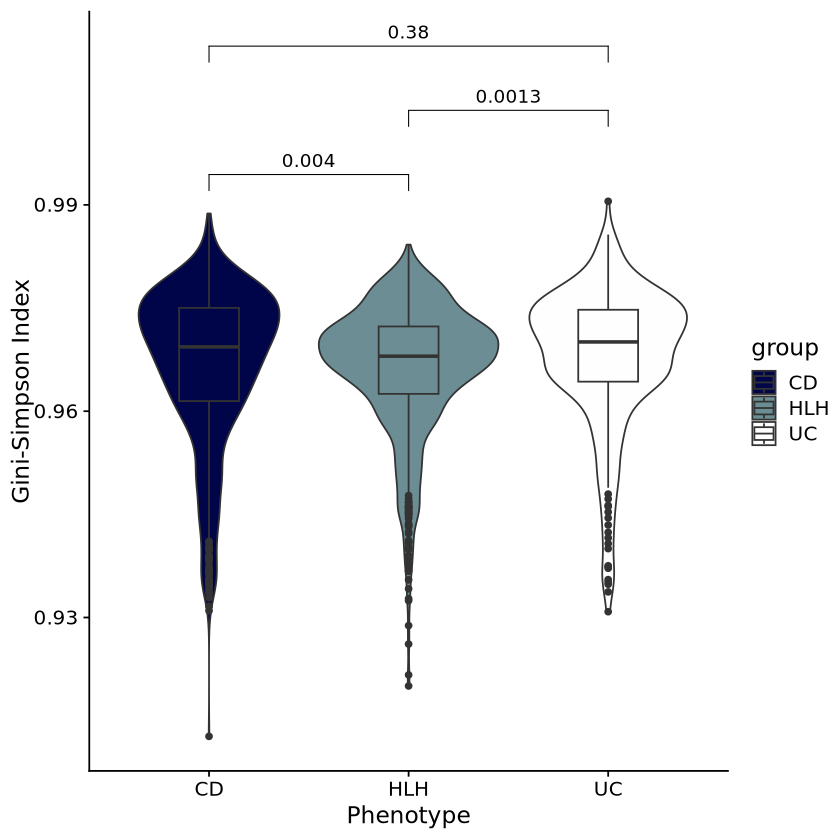

In [ ]:
pl <- ggplot(gini_simpson_results, aes(y = gini_simpson, x = group, fill = group)) +
  geom_violin() +
  stat_boxplot(width = 0.3) + 
  scale_fill_scico_d(palette = 'davos') +
  labs(x = 'Phenotype',
       y = 'Gini-Simpson Index') +
  stat_compare_means(method = "wilcox.test", 
                label = "p.format", 
                comparisons = list(c("CD", "HC"), c("HC", "UC"), c("CD", "UC"))) + 
  theme_cowplot()
print(pl)

In [77]:
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/gini_simpson_index.pdf',
       plot = pl, width = 8, height = 6, units = 'in', dpi = 600)
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/gini_simpson_index.png',
       plot = pl, width = 8, height = 6, units = 'in', dpi = 600)

In [ ]:
mannwhit_results <- wilcox.test(gini_simpson_results[group == 'CD', c(gini_simpson)], gini_simpson_results[group == 'HLH', c(gini_simpson)], alternative = "two.sided")


            Length Class  Mode     
statistic   1      -none- numeric  
parameter   0      -none- NULL     
p.value     1      -none- numeric  
null.value  1      -none- numeric  
alternative 1      -none- character
method      1      -none- character
data.name   1      -none- character

### Measuring clonality (Immunarch)

In [ ]:
files <- list.files('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/cdr3/minimal_preprocessed/', full.names = TRUE)
immunorep_list <- lapply(files, function(x){
    setnames(fread(x),old = c('patient_id','amino_acid', 'Count', 'cum_expansion_freq', 'v_gene', 'j_gene'),
        new = c('Sample', 'CDR3.aa', 'Clones', 'Proportion', 'V.name', 'J.name'))
    })
names(immunorep_list) <- sapply(immunorep_list, function(dt) dt[1, Sample])

In [13]:
phenotypes <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/phenotypes.tsv')
setnames(phenotypes, old = c('patient_id', 'group'), new = c('Sample', 'Status'))

In [14]:
our_immdata <- list()
#our_immdata$data <- immunorep_list
our_immdata$meta <- phenotypes


In [ ]:
imm_top <- repClonality(our_immdata$data, .method = "top", .head = c(10, 100, 1000, 10000, 100000))
imm_rare <- repClonality(our_immdata$data, .method = "rare")
imm_hom <- repClonality(our_immdata$data,
  .method = "homeo",
  .clone.types = c(Small = .0001, Medium = .001, Large = .01, Hyperexpanded = 1)
)
fwrite(as.data.table(imm_top, keep.rownames = TRUE),
  '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_top.tsv',
  sep = '\t', quote = FALSE, row.names = TRUE)
fwrite(as.data.table(imm_rare, keep.rownames = TRUE),
  '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_rare.tsv',
  sep = '\t', quote = FALSE, row.names = TRUE)
fwrite(as.data.table(imm_hom, keep.rownames = TRUE),
  '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_hom.tsv',
  sep = '\t', quote = FALSE, row.names = TRUE)

In [ ]:
imm_rare_pl <- vis(imm_rare, .by = "Status", .meta = our_immdata$meta)
imm_rare_pl
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/imm_rare.pdf', imm_rare_pl, width = 8, height = 6, units = 'in', dpi = 600)

Using Sample as id variables



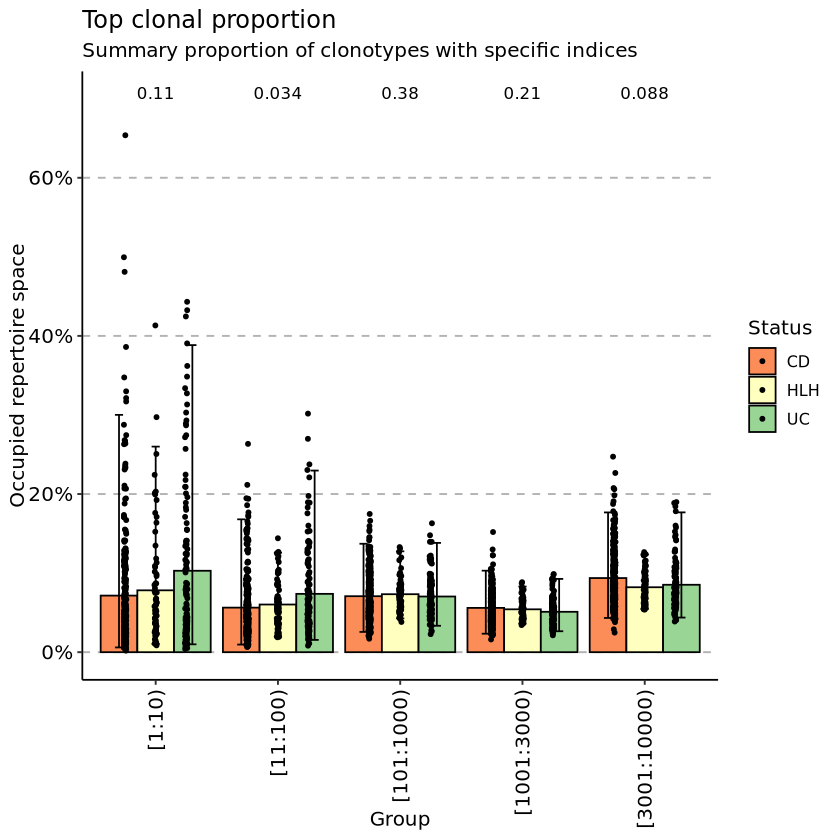

In [ ]:
imm_top_pl <- vis(imm_top, .by = "Status", .meta = our_immdata$meta)
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/imm_top.pdf', imm_top_pl,
       width = 8, height = 6, units = 'in', dpi = 600)

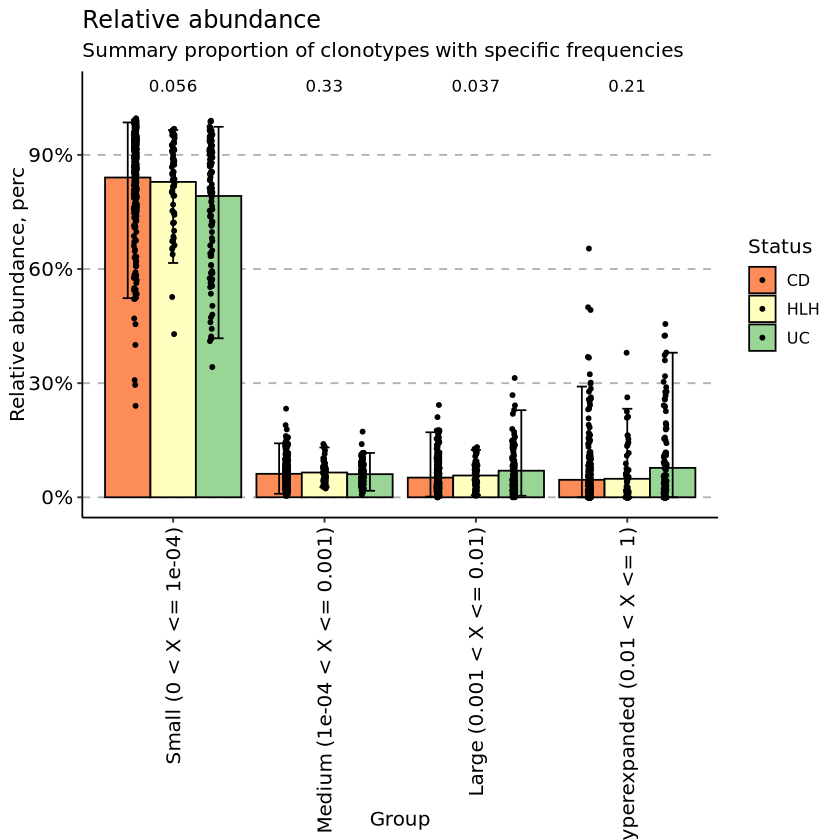

In [ ]:
imm_hom_pl <- vis(imm_hom, .by = "Status", .meta = our_immdata$meta)
imm_hom_pl
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/imm_hom.pdf', imm_hom_pl
       width = 8, height = 6, units = 'in', dpi = 600)

#### Immune homostasis

In [31]:
imm_hom <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_hom.tsv')
imm_hom[, c('V1') := NULL]
setnames(imm_hom, old = 'rn', new = 'Sample')
imm_hom <- merge(imm_hom, phenotypes, by = 'Sample')
imm_hom_melt <- melt(imm_hom, id.vars = c('Sample', 'Status'), variable.name = 'Homostasis', value.name = 'Clones')

In [35]:
num_cols <- grep("\\d", names(imm_hom))
names(imm_hom)[num_cols] <- gsub(" ", "\n", names(imm_hom)[num_cols])

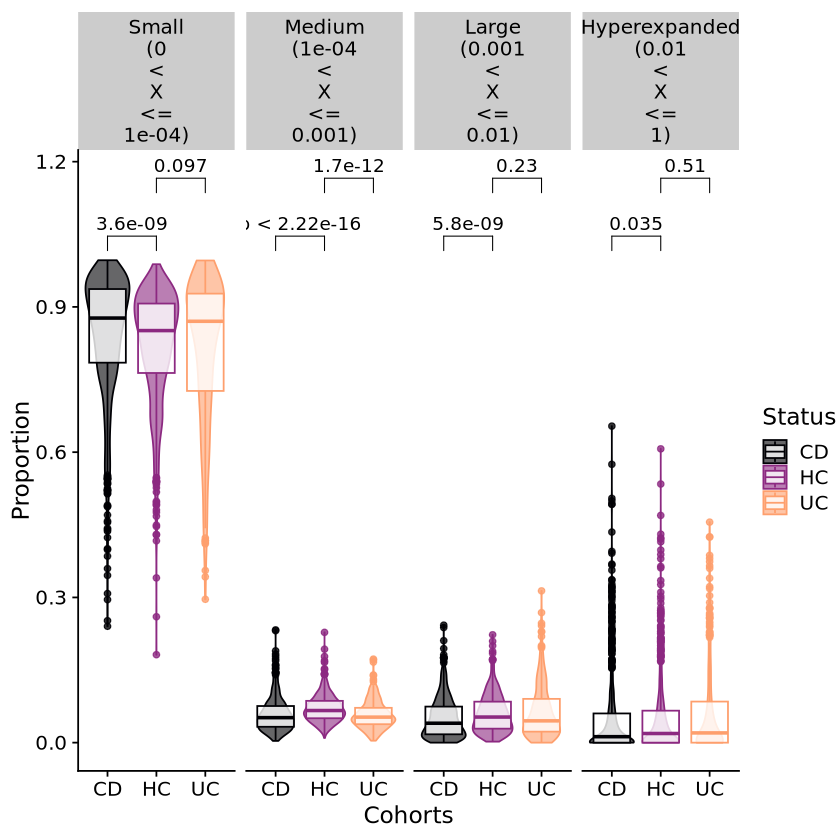

In [38]:
homo_pl <- ggplot(imm_hom_melt, aes(y = Clones, x = Status, color = Status, group = Status)) +
   geom_violin(aes(fill = Status), alpha = 0.6) +
     geom_boxplot(position = 'dodge', alpha = 0.8) +
  #geom_point( alpha = 0.8) +
  
     stat_compare_means(aes(y = Clones, x = Status), method = "wilcox.test", 
               label = "p.format", 
               comparisons = list(c("CD", "HC"), 
                              c("HC", "UC")
                              #c("CD", "UC"))
     )) +
  scale_color_viridis_d(option = 'magma', end = 0.8) +
  scale_fill_viridis_d(option = 'magma', end = 0.8) +
  labs(
       x = 'Cohorts',
       y = 'Proportion') +
  facet_grid( ~ Homostasis, scales = 'free_x') +
  theme_cowplot() 
print(homo_pl)

In [39]:
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/homo_clonality.pdf',
       homo_pl, width = 9, height = 6, units = 'in', dpi = 600)
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/homo_clonality.png',
       homo_pl, width = 9, height = 6, units = 'in', dpi = 600)

#### Top clones

In [16]:
imm_top <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_top.tsv', header = TRUE)
imm_top[, c('V1') := NULL]
setnames(imm_top, old = 'rn', new = 'Sample')
imm_top <- merge(imm_top, phenotypes, by = 'Sample')
num_cols <- grep("\\d", names(imm_top))
names(imm_top)[num_cols] <- paste0("Top_", names(imm_top)[num_cols])
imm_top_melt <- melt(imm_top, id.vars = c('Sample', 'Status'), variable.name = 'Top', value.name = 'Clones')

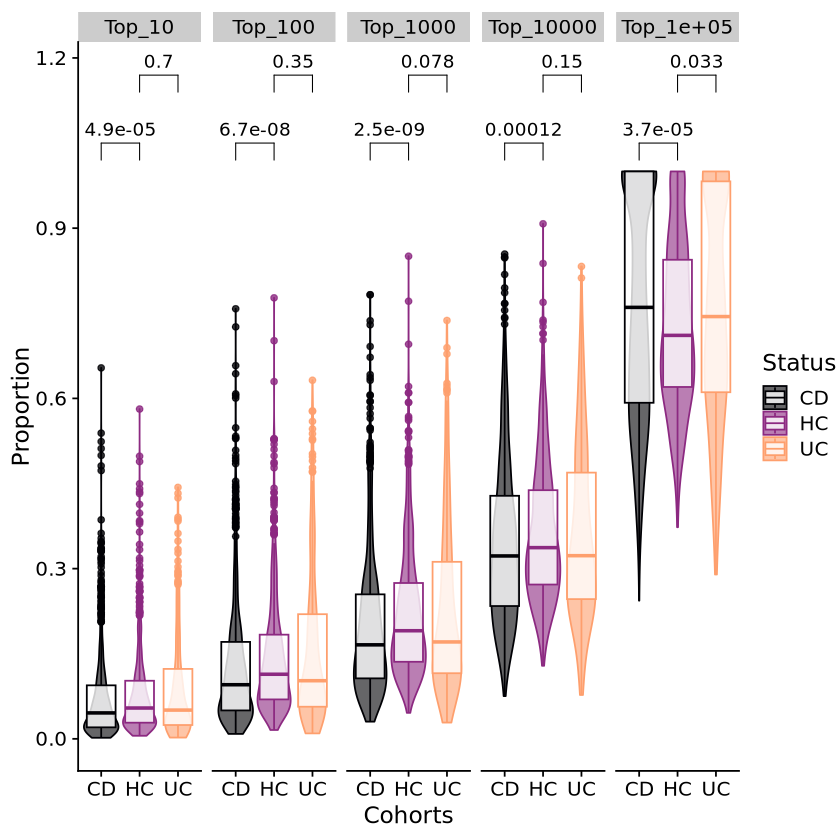

In [24]:
top_pl <- ggplot(imm_top_melt, aes(y = Clones, x = Status, color = Status, group = Status)) +
   geom_violin(aes(fill = Status), alpha = 0.6) +
     geom_boxplot(position = 'dodge', alpha = 0.8) +
  #geom_point( alpha = 0.8) +
  
     stat_compare_means(aes(y = Clones, x = Status), method = "wilcox.test", 
               label = "p.format", 
               comparisons = list(c("CD", "HC"), 
                              c("HC", "UC")
                              #c("CD", "UC"))
     )) +
  scale_color_viridis_d(option = 'magma', end = 0.8) +
  scale_fill_viridis_d(option = 'magma', end = 0.8) +
  labs(
       x = 'Cohorts',
       y = 'Proportion') +
  facet_grid( ~ Top, scales = 'free_x') +
  theme_cowplot() 
print(top_pl)

In [25]:
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/top_clonality.pdf',
       top_pl, width = 8, height = 6, units = 'in', dpi = 600)
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/top_clonality.png',
       top_pl, width = 8, height = 6, units = 'in', dpi = 600)

#### Rare clones

In [23]:
imm_rare <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_rare.tsv')
imm_rare[, c('V1') := NULL]
setnames(imm_rare, old = 'rn', new = 'Sample')
imm_rare <- merge(imm_rare, phenotypes, by = 'Sample')
num_cols <- grep("\\d", names(imm_rare))
names(imm_rare)[num_cols] <- paste0("Rare_", names(imm_rare)[num_cols])
imm_rare_melt <- melt(imm_rare, id.vars = c('Sample', 'Status'), variable.name = 'Rare', value.name = 'Clones')


Warning message:
“Computation failed in `stat_signif()`.
Caused by error in `if (p_value < .Machine$double.eps) ...`:
! missing value where TRUE/FALSE needed”


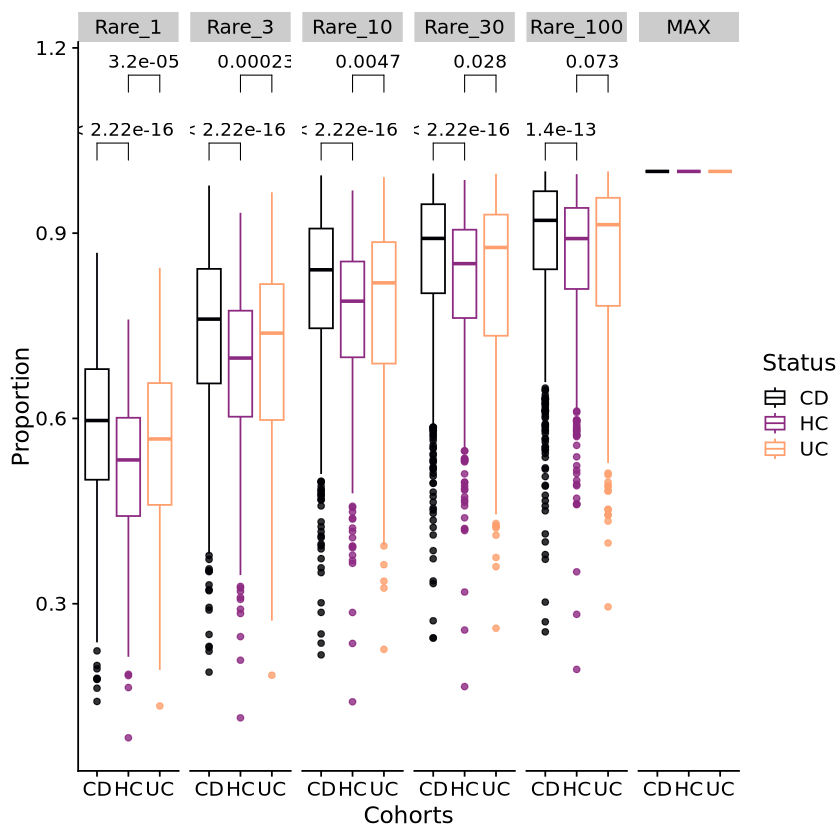

In [26]:
rare_pl <- ggplot(imm_rare_melt, aes(y = Clones, x = Status, color = Status, group = Status)) +
     geom_boxplot(position = 'dodge', alpha = 0.8) +
  stat_compare_means(aes(y = Clones, x = Status), method = "wilcox.test", 
            label = "p.format", 
            comparisons = list(c("CD", "HC"), 
                              c("HC", "UC")
                              #c("CD", "UC")
                              )) +
  facet_grid( ~ Rare, scales = 'free_x') +
  scale_color_viridis_d(option = 'magma', end = 0.8) +
  labs(
       x = 'Cohorts',
       y = 'Proportion') +
  theme_cowplot() 
print(rare_pl)

In [27]:
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/rare_clonality.pdf',
       rare_pl, width = 8, height = 6, units = 'in', dpi = 600)
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/rare_clonality.png',
       rare_pl, width = 8, height = 6, units = 'in', dpi = 600)

Warning message:
“Computation failed in `stat_signif()`.
Caused by error in `if (p_value < .Machine$double.eps) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`.
Caused by error in `if (p_value < .Machine$double.eps) ...`:
! missing value where TRUE/FALSE needed”


In [73]:
trb <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/cdr3/minimal_preprocessed/I1150.tsv')
setorder(trb, -cum_expansion_freq)

In [74]:
sum(trb$cum_expansion_freq)

[1] 0.9257762

In [75]:
head(trb)

patient_id,amino_acid,v_gene,j_gene,length_seq,unique_count,cum_expansion_freq,Count
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>
I1150,CASSLAGFNSPLHF,TCRBV07-06,TCRBJ01-06,14,1,0.43321770,90789
I1150,CASSPSRGYEEKLFF,TCRBV07-08,TCRBJ01-04,15,1,0.03775368,7912
I1150,CASSWVGGSFPDTQYF,TCRBV04-03,TCRBJ02-03,16,1,0.02628251,5508
I1150,CASSLRTGGAYEQYF,TCRBV07-08,TCRBJ02-07,15,1,0.01943990,4074
I1150,CASSLQGYGYTF,TCRBV12-03,TCRBJ01-02,12,1,0.01692521,3547
I1150,CATSPRTGETGELFF,TCRBV15-01,TCRBJ02-02,15,1,0.01669617,3499


In [70]:
imm_top[Top_10 > 0.5]

Sample,Top_10,Top_100,Top_1000,Top_10000,Top_1e+05,Status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
H265,0.5812283,0.7772498,0.8505764,0.9077456,1.0000000,HLH
I1150,0.6537930,0.7579556,0.7826755,0.8490418,1.0000000,CD
I361,0.5238820,0.6079777,0.6418353,0.7117155,1.0000000,CD
I474,0.5387634,0.7260485,0.7826242,0.8476012,1.0000000,CD
I658,0.5116036,0.5482386,0.5948764,0.6616348,0.8292104,CD


In [ ]:
imm_ov1 <- repOverlap(our_immdata$data, .method = "public", .verbose = F)
imm_ov2 <- repOverlap(our_immdata$data, .method = "morisita", .verbose = F)
fwrite(as.data.table(imm_ov1,keep.rownames = TRUE), '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_public.tsv', sep = '\t')
fwrite(as.data.table(imm_ov2,keep.rownames = TRUE), '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_morista.tsv', sep = '\t')

p1 <- vis(imm_ov1)
p2 <- vis(imm_ov2, .text.size = 2)

p_both <- p1 + p2
ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/imm_overlap.pdf', p_both,
       width = 8, height = 6, units = 'in', dpi = 600)

In [9]:
imm_ov1 <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_public.tsv')
imm_ov2 <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_morista.tsv')

ERROR: Error in fread("/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_morista.tsv"): File '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/imm_morista.tsv' does not exist or is non-readable. getwd()=='/work_ikmb/sukmb667/projects/cdr3-qtl'


In [ ]:
repOverlapAnalysis(imm_ov1, "mds") %>% vis() 

ggsave('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/imm_overlap_mds.pdf',
       width = 8, height = 6, units = 'in', dpi = 600)

Warning message in t(res.pca$x %*% t(res.pca$rotation)) + res.pca$center:
“Länge des längeren Objektes
 	 ist kein Vielfaches der Länge des kürzeren Objektes”


ERROR: Error in grid.Call(C_convert, x, as.integer(whatfrom), as.integer(whatto), : Viewport hat keine Dimension(en)


### Сalculating frequencies we followed those rules:
#### we removed from the analysis length_positions which have less than 20 overall AA counts 

#### Removing V and J genes

In [2]:
source('CDR3_freq_after_removing_germ_line_vj.R')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


Registered S3 methods overwritten by 'ggtern':
  method           from   
  grid.draw.ggplot ggplot2
  plot.ggplot      ggplot2
  print.ggplot     ggplot2

--
Remember to cite, run citation(package = 'ggtern') for further info.
--


Attaching package: ‘ggtern’


The following objects are masked from ‘package:ggplot2’:

    aes, annotate, ggplot, ggplot_build, ggplot_gtable, ggplotGrob,
    ggsave, layer_data, theme_bw, theme_classic, theme_dark,
    theme_gray, theme_light, theme_linedraw, theme_minimal, theme_void


Loading required package: viridisLite


Attaching package: ‘arrow’


The following obje

In [25]:
setorder(cdr3_long_freq, unique_count)

In [ ]:
#-------for Methods section some description about private and public clonotypes---------
#cdr3_qc %>% group_by(amino_acids) %>% summarise(carriers = sum(amino_acids)) %>% filter(carriers > 2)  %>% arrange(carriers)

### we calculate frequencies and remove not public AA_pos_length (important for IRT - inverse rank transformation)

In [69]:
first_file = TRUE
for (f in list.files(path_out)){
    cdr3_freq <- fread(paste0(path_out,f))
    cdr3_freq <- cdr3_freq[, `:=`(norm_freq_expand = cum_expansion_freq/sum(cum_expansion_freq),
                  norm_freq_unique = unique_count/total_imgt_count), 
           by = .(patient_id, length_seq, IMGT)]
    fwrite(cdr3_freq, '../data/cdr3_all_freq_with_expansion_excluded_germ_long.tsv', 
           sep = '\t', quote = FALSE, row.names = FALSE, append = TRUE, 
           col.names = first_file)
    first_file <- FALSE
}

In [85]:
cdr3_freq <- fread('../data/cdr3_all_freq_with_expansion_excluded_germ_long.tsv')

In [83]:
cdr3_freq <- cdr3_freq[, `:=`(
    n_carriers = uniqueN(patient_id),
    irt_freq_unique = qnorm((rank(norm_freq_unique, na.last="keep") - 0.5) / sum(!is.na(norm_freq_unique))),
    irt_freq_expand = qnorm((rank(norm_freq_expand, na.last="keep") - 0.5) / sum(!is.na(norm_freq_expand)))
), by = .(length_seq, IMGT, AA)]


ERROR: Error: In `:=`(col1=val1, col2=val2, ...) form, all arguments must be named.


In [7]:
fwrite(cdr3_freq, '../data/cdr3_all_freq_with_IRT.tsv')

### Prepate CDR3_HLA matrixes with IRT, LOG, FREQ and UNIQUE_COUNT (expanded and not expanded) for AA which are present in almost everyone (to keep normality)

#### I filter those individuals from analysis if total_imgt_count with all AA are less than 20 and if for AA less than 200 carriers

In [ ]:
# Based on IPD-IMGT/HLA 3.55.0 we extract HLA variation data 
# for each patients’ alleles and for each HLA site
# We built separate “allele matrix” for each HLA variable site 
# within each HLA gene, combining all patients’ alleles
# with separate “CDR3 amino acids matrix” 
# for each CDR3 position (IMGT annotation) within each CDR3 length
# In total 7280  matrices for each variable sites within each HLA gene 
# and all combinations with CDR3 positions. 
source('cdr3-hla-matrices-oktober.r')

In [122]:
l_imgt <- cdr3_freq[length_seq == 15 & IMGT == 'P115']

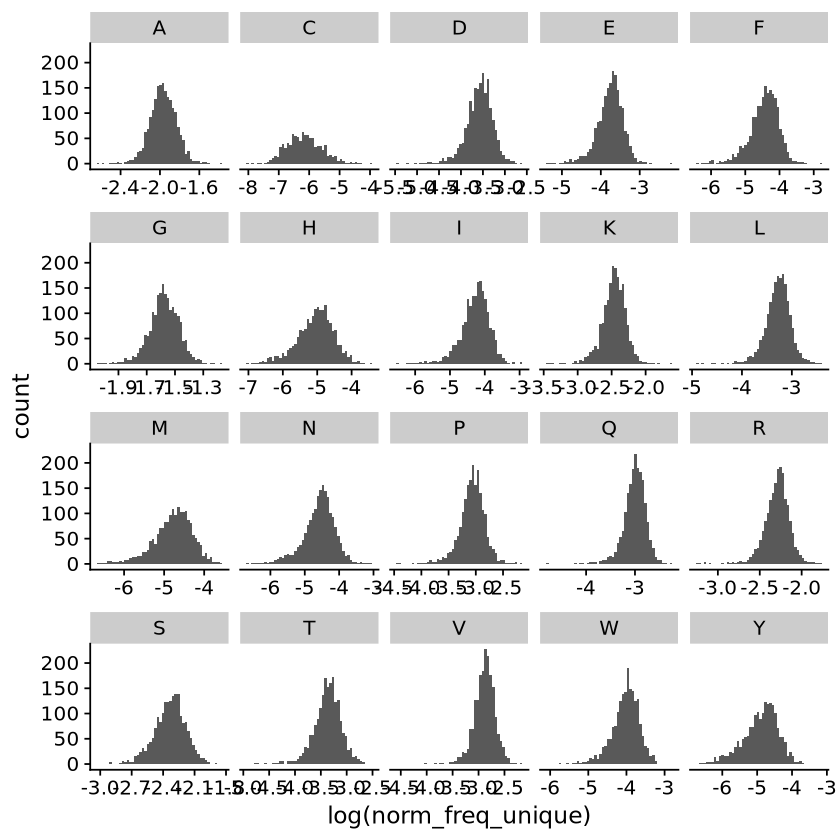

In [123]:
ggplot(l_imgt, aes(log(norm_freq_unique) )) +
geom_histogram(bins = 50) +
theme_cowplot() +
facet_wrap(~AA, scale = 'free_x')


In [152]:
cdr3_L_P


patient_id,length_seq,IMGT,AA,cum_expansion_freq,unique_count,total_imgt_count,norm_freq_expand,norm_freq_unique,n_carriers,irt_freq_unique,irt_freq_expand
<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
H1,16,P118,V,0.001851718,699,700,0.9957714,0.9985714,210,0.55895787,-1.099778662
H125,16,P118,V,0.001764104,494,494,1.0000000,1.0000000,210,1.08891703,1.088917029
H142,16,P118,V,0.002179838,521,521,1.0000000,1.0000000,210,1.08891703,1.088917029
H152,16,P118,V,0.001362545,472,475,0.9940448,0.9936842,210,-0.65957935,-1.295238129
H162,16,P118,V,0.001425247,265,270,0.9934369,0.9814815,210,-2.44999766,-1.447992859
H167,16,P118,V,0.001509915,562,566,0.9976879,0.9929329,210,-0.72015662,-0.450457001
H182,16,P118,V,0.001809287,495,497,0.9988156,0.9959759,210,-0.18608137,0.053739318
H189,16,P118,V,0.002110940,384,385,0.9996835,0.9974026,210,0.23490082,0.517564860
H194,16,P118,V,0.001449030,318,320,0.9972736,0.9937500,210,-0.64481417,-0.674489750


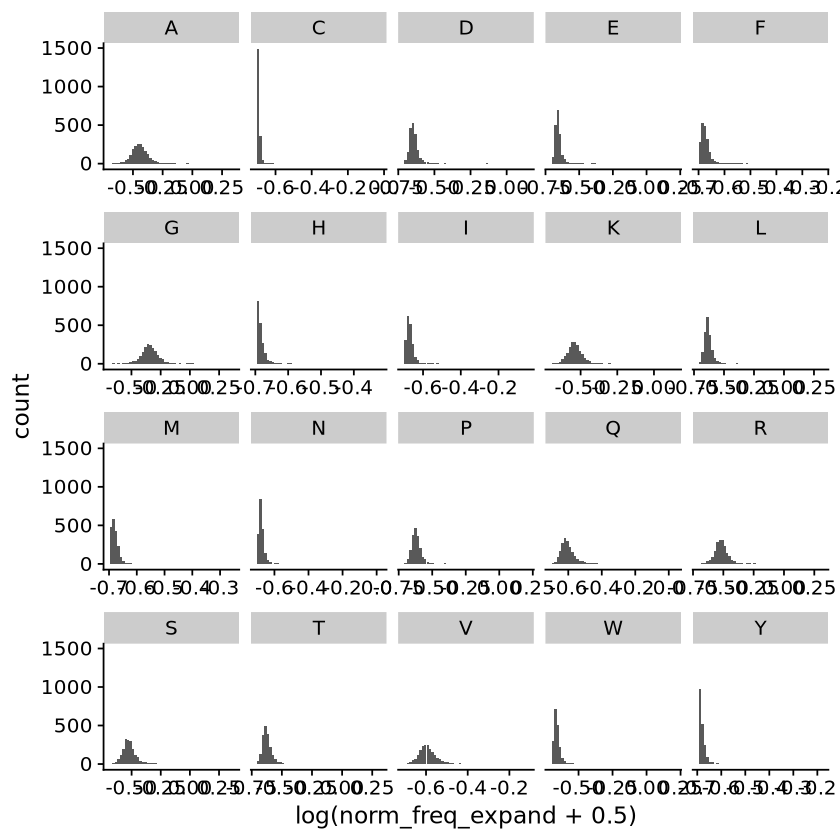

In [65]:
ggplot(final_dt, aes(log(norm_freq_expand + 0.5) ) ) +
geom_histogram(bins = 50) +
theme_cowplot() +
facet_wrap(~AA, scale = 'free_x')


### Checking what this IRT does to the data.....and I am sorry, but that doesn't look normal, it has crazy spikes. Instead of that, I will use raw frequencies and use modelling with gamma distribution

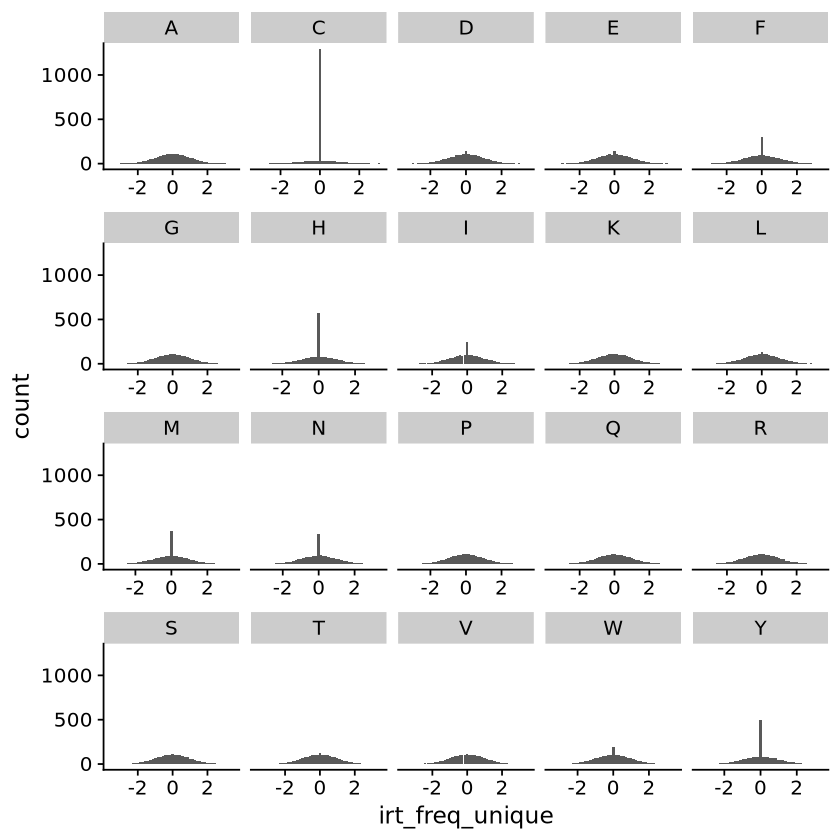

In [305]:
ggplot(final_dt, aes(irt_freq_unique ) ) +
geom_histogram(bins = 50) +
theme_cowplot() +
facet_wrap(~AA, scale = 'free_x')


#### remove AA_pos with less that 50% carriers (as in Ishigaki et al.)

In [60]:
cdr3_freq_public <- cdr3_frequencies[n_carriers >= ids_qc/2]

In [63]:
write_tsv(cdr3_freq_public, '../data/cdr3_freq_healthy_and_ibd_public_v2.tsv')

In [64]:
cdr3_freq_public %>% arrange(desc(relativ_freq)) %>% filter(IMGT == 'P116', AA == 'L')

patient_id,length,IMGT,AA,total_AA_count,total_IMGT_count,relativ_freq,n_carriers,n_ind_high_freq
<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>
H382,14,P116,L,43,184,0.2336957,1569,0
I1413,12,P116,L,21,104,0.2019231,1813,0
H415,14,P116,L,23,116,0.1982759,1569,0
I503,14,P116,L,22,115,0.1913043,1569,0
I548,12,P116,L,20,105,0.1904762,1813,0
I989,12,P116,L,20,109,0.1834862,1813,0
H265,13,P116,L,22,120,0.1833333,1792,0
H123,14,P116,L,33,181,0.1823204,1569,0
I379,13,P116,L,37,204,0.1813725,1792,0


### IBD CDR3 freq separately

In [3]:
ibd_cdr3_freq <- cdr3_frequencies[grep('I', patient_id)]

### recalculate n_carriers, calculate only among IBD and filter "rare" AA

In [4]:
ibd_ids <- uniqueN(ibd_cdr3_freq$patient_id)

In [5]:
ibd_ids

[1] 1150

In [6]:
ibd_cdr3_freq <- ibd_cdr3_freq[, `:=`(
      n_carriers = uniqueN(patient_id),
      n_ind_high_freq = sum(relativ_freq > 0.6)
    ), by = .(length, IMGT, AA)]

In [7]:
ibd_cdr3_freq_public <- ibd_cdr3_freq[n_carriers>=ibd_ids/2]

In [25]:
write_tsv(ibd_cdr3_freq_public, '../data/cdr3_freq_ibd_public_v2.tsv')

In [10]:
ibd_cdr3_freq_public

patient_id,length,IMGT,AA,total_AA_count,total_IMGT_count,relativ_freq,n_carriers,n_ind_high_freq
<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>
I0,12,P106,G,91,514,0.17704280,1147,0
I0,12,P106,R,26,514,0.05058366,1142,0
I0,12,P106,T,117,514,0.22762646,1147,0
I0,12,P106,I,20,514,0.03891051,1145,0
I0,12,P106,C,18,514,0.03501946,1076,0
I0,12,P106,L,22,514,0.04280156,1124,0
I0,12,P106,P,16,514,0.03112840,1108,0
I0,12,P106,A,73,514,0.14202335,1147,0
I0,12,P106,F,15,514,0.02918288,935,0


### Healthy CDR3 freq separately

In [12]:
healthy_cdr3_freq <- cdr3_frequencies[grep('H', patient_id)]

In [20]:
healthy_ids <- uniqueN(healthy_cdr3_freq$patient_id)

In [26]:
healthy_ids

[1] 772

### recalculate n_carriers, calculate only among Healthy and filter "rare" AA

In [17]:
healthy_cdr3_freq <- healthy_cdr3_freq[, `:=`(
      n_carriers = uniqueN(patient_id),
      n_ind_high_freq = sum(relativ_freq > 0.6)
    ), by = .(length, IMGT, AA)]

In [21]:
healthy_cdr3_freq_public <- healthy_cdr3_freq[n_carriers>=healthy_ids/2]

In [24]:
write_tsv(healthy_cdr3_freq_public, '../data/cdr3_freq_healthy_public_v2.tsv')

## Visualisation and summary statistics for HEALTHY and IBD separately

In [50]:
healthy_cdr3_grouped <- healhy_cdr3_freq %>% group_by(length, IMGT) %>% group_split() 

In [52]:
summary(healthy_cdr3_grouped[[1]])

  patient_id            length       IMGT                AA           
 Length:15439       Min.   :12   Length:15439       Length:15439      
 Class :character   1st Qu.:12   Class :character   Class :character  
 Mode  :character   Median :12   Mode  :character   Mode  :character  
                    Mean   :12                                        
                    3rd Qu.:12                                        
                    Max.   :12                                        
 total_AA_count    total_IMGT_count
 Min.   :    1.0   Min.   : 1004   
 1st Qu.:   91.0   1st Qu.: 6939   
 Median :  204.0   Median : 8769   
 Mean   :  466.8   Mean   : 9336   
 3rd Qu.:  428.0   3rd Qu.:11152   
 Max.   :21251.0   Max.   :35763   

In [58]:
for (gr in healthy_cdr3_grouped){
    print(pull(gr, length)[1])
    print(pull(gr,IMGT)[1])
    print(summary(gr))
}

[1] 12
[1] "P107"
  patient_id            length       IMGT                AA           
 Length:15439       Min.   :12   Length:15439       Length:15439      
 Class :character   1st Qu.:12   Class :character   Class :character  
 Mode  :character   Median :12   Mode  :character   Mode  :character  
                    Mean   :12                                        
                    3rd Qu.:12                                        
                    Max.   :12                                        
 total_AA_count    total_IMGT_count
 Min.   :    1.0   Min.   : 1004   
 1st Qu.:   91.0   1st Qu.: 6939   
 Median :  204.0   Median : 8769   
 Mean   :  466.8   Mean   : 9336   
 3rd Qu.:  428.0   3rd Qu.:11152   
 Max.   :21251.0   Max.   :35763   
[1] 12
[1] "P108"
  patient_id            length       IMGT                AA           
 Length:15320       Min.   :12   Length:15320       Length:15320      
 Class :character   1st Qu.:12   Class :character   Class :character  
 M

In [23]:
healthy_cdr3_freq %>% filter(length==13, IMGT == 'P116') %>% arrange(desc(total_AA_count))

patient_id,length,IMGT,AA,total_AA_count,total_IMGT_count,relativ_freq,n_carriers,n_ind_high_freq
<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>
H483,13,P116,E,159,1231,0.12916328,761,0
H652,13,P116,R,144,1316,0.10942249,761,0
H483,13,P116,G,143,1231,0.11616572,760,0
H652,13,P116,E,143,1316,0.10866261,761,0
H652,13,P116,P,140,1316,0.10638298,761,0
H483,13,P116,R,136,1231,0.11047929,761,0
H745,13,P116,E,134,1058,0.12665406,761,0
H73,13,P116,E,125,1133,0.11032657,761,0
H99,13,P116,E,123,948,0.12974684,761,0


In [17]:
median_aa_counts <- healthy_cdr3_pivoted %>% group_by(length,IMGT,AA) %>% summarise(median_count = median(count), .groups = 'keep')

Adding missing grouping variables: `patient_id`, `length`


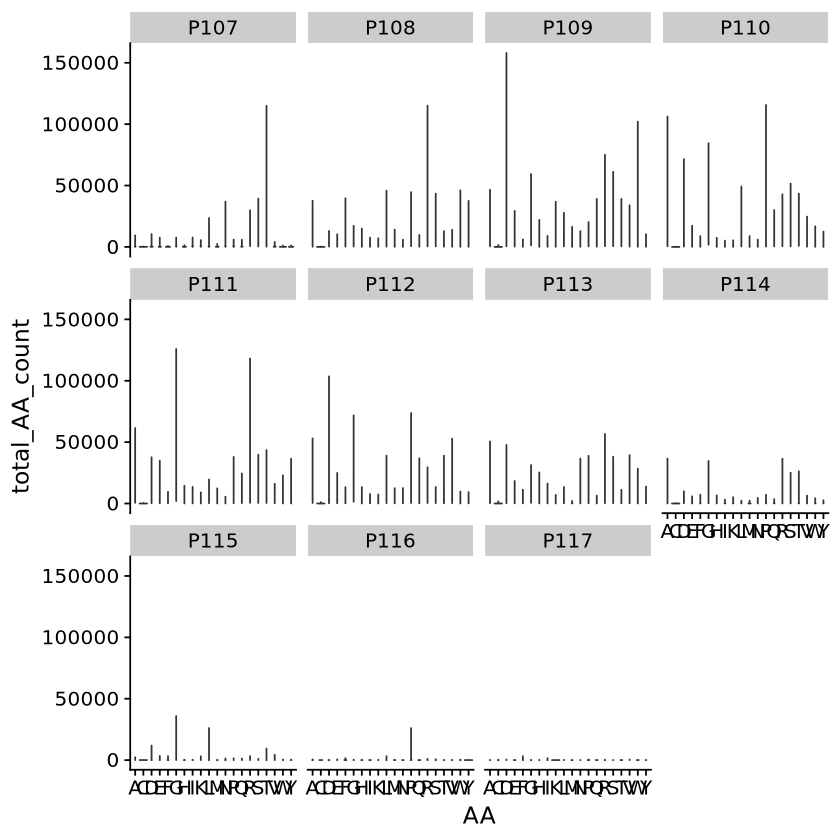

In [36]:
ggplot(healhy_cdr3_counts %>% filter(length == 15) %>% select(IMGT, AA , total_AA_count), aes(x = AA, y = total_AA_count)) +
    geom_violin(scale = 'area')+
    theme_cowplot()+
    facet_wrap(~IMGT)

In [155]:
aa <- freq_aa_across_all_patients %>% select(length, IMGT, AA, sum_n, relativ_frq_in_all, n_carriers) %>% mutate(length = as.factor(length))
aa_freq_plot <- ggplot(aa, aes(x = IMGT, y = sum_n, group = length, linetype = length)) +
    geom_line() +
    scale_linetype_binned() +
    scale_color_viridis() +
    theme_light() +
    labs(x = '', y = 'Counts') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    facet_wrap(~ AA)

  
#save_plot('../plots/cdr3_aa_counts_patients_one_scale.jpg', aa_freq_plot, ncol = 2, nrow = 3, base_height = 3)

### visualisation part, including Sankey plots

In [92]:
lengths <- unique(pull(pivoted_together, length))
for (L in lengths){
    
    pivoted_for_sankey <- pivoted_together %>% 
        filter(length == L) %>%
        dplyr::select(length, IMGT, AA) %>%
        mutate(length = as.character(length)) %>% 
        group_by(IMGT, AA) %>% 
        count() %>%   
        mutate(list_n = list(seq(n))) %>% 
        dplyr::select(c(length, IMGT, AA, list_n))  %>% 
        unnest(list_n) %>% 
        ungroup()
    
    pivoted_for_sankey_long <- pivoted_for_sankey %>% select(length, IMGT, AA) %>% make_long(length, IMGT, AA)
    
    pl <- ggplot(pivoted_for_sankey_long, aes(x = x, 
               next_x = next_x, 
               node = node, 
               next_node = next_node, 
               label = node,
               fill = factor(node)))
    pl <- pl + geom_sankey(flow.alpha = 0.5
                          , node.color = "black"
                          ,show.legend = FALSE)
    pl <- pl + geom_sankey_label(size = 3, color = "black", fill= "white", hjust = -0.5)
    pl <- pl + theme_bw()
    pl <- pl + theme(legend.position = "none")
    pl <- pl + theme(axis.title = element_blank()
                      , axis.text.y = element_blank()
                      , axis.ticks = element_blank()  
                      , panel.grid = element_blank())
    pl <- pl + scale_fill_viridis_d(option = "inferno")
    pl <- pl + labs(title = "CDR3 summary for all patients", 
                    subtitle = "Usage of AA for each position with different lengths", 
                    #caption = "Evgeniya Lokes",
                    fill = 'Nodes')
    
    pl
    ggsave(paste0('../plots/Sankey/',L,'_cdr3_aa_sankey.jpg'),pl, width = 5, height = 5)

    }
    

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't select columns that don't exist.
[31m✖[39m Column `length` doesn't exist.


In [ ]:
for (patient in patients){
    pivoted_for_sankey <- pivoted_together %>% 
    select(length, IMGT, AA) %>%
    mutate(length = as.character(length)) %>% 
    group_by(length, IMGT, AA) %>% 
    count() %>% 
    mutate(list_n = list(seq(n))) %>% 
    select(c(length, IMGT, AA, list_n))  %>% 
    unnest(list_n) %>% 
    ungroup()
    }

### -------some plots of densities----

In [ ]:

den <- ggplot(tdata_pivot_pos_length_density) +
  geom_tile(aes(fill = n, x = IMGT, y = length))
den

relativ_freq <- ggplot(tdata_pivot_pos_length_aa_freq) +
  geom_tile(aes(fill = relativ_freq, x = IMGT, y = length))
relativ_freq


for (i in 12:18) {
  plot_length_position <- ggplot(subset(tdata_pivot_pos_length_aa_freq, length == i), aes(x = IMGT, y = relativ_freq, color = AA)) +
    geom_point() +
    ggtitle(paste0('Length',i))
  ggsave(paste0('plots/Length',i,sep='', '_.jpeg'), plot_length_position)
}

facet_plots <- ggplot(tdata_pivot_pos_length_aa_freq, aes(x = total_per_length_position, y = n, color = AA)) +
  geom_point()
facet_plots
facet_plots + facet_wrap(~IMGT) 

unique(tdata_pivot_pos_length_aa_freq$AA[tdata_pivot_pos_length_aa_freq$relativ_freq >= 0.3])

In [31]:
test <- read.csv('data/CDR3/100_pivoted_cdr3.tsv', sep = '\t', header = T)

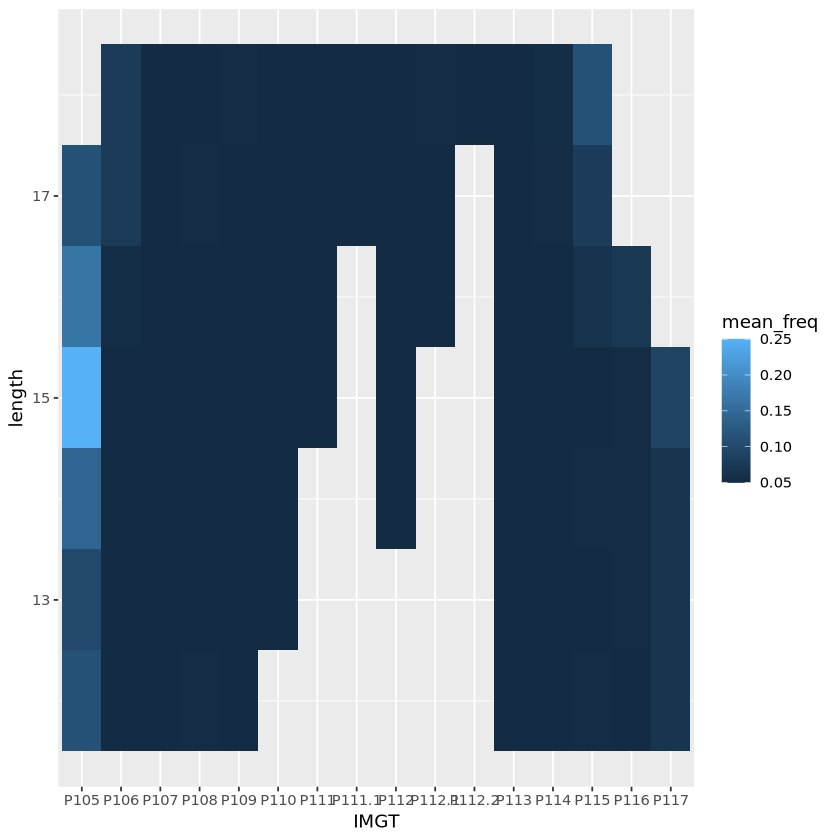

In [33]:

relativ_freq <- ggplot(test %>% group_by(length,IMGT) %>% mutate(mean_freq = mean(relativ_freq)),aes(x = IMGT, y = length)) +
  geom_tile(aes(fill = mean_freq))
relativ_freq

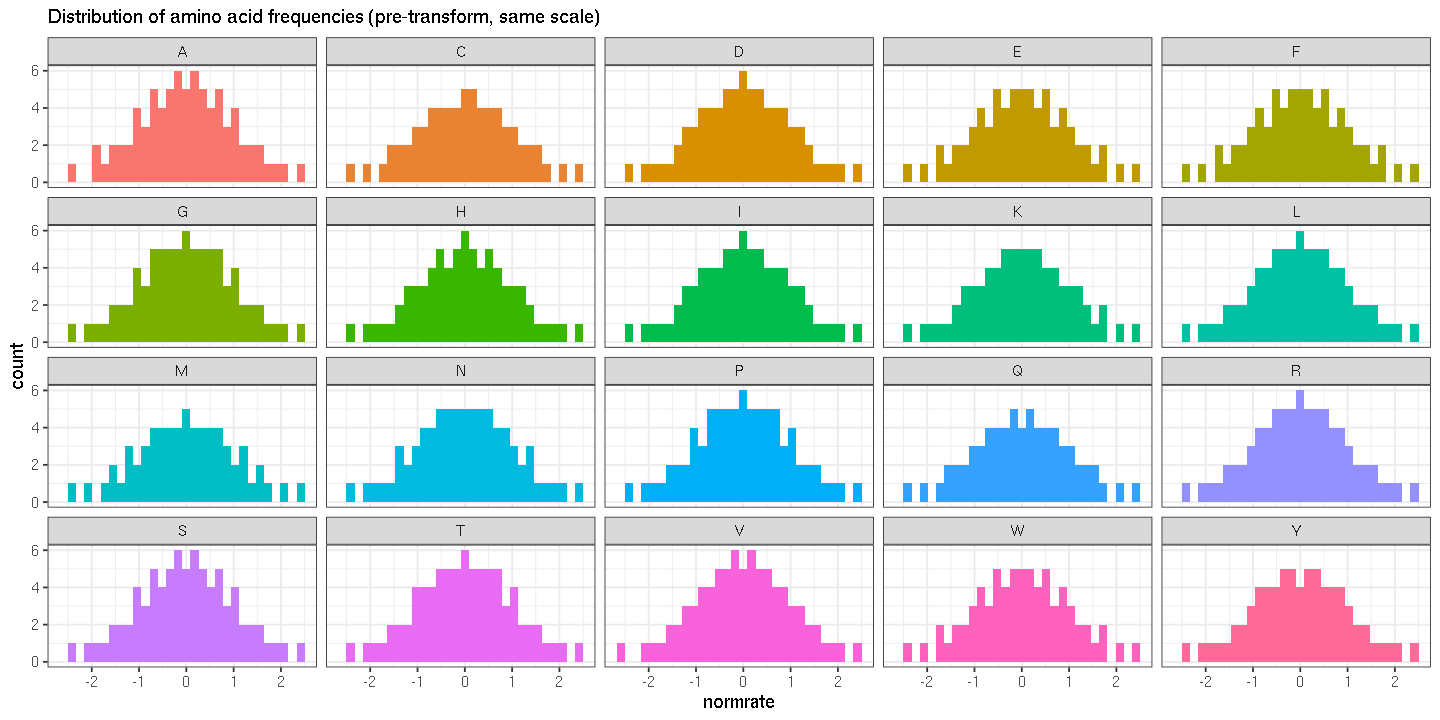

In [15]:
# the distributions of CDR3 amino acid frequencies of post-transformation.
#as you can see, the data is normally distributted.
options(repr.plot.width=12, repr.plot.height=6)
df <- pall
df %>% ggplot(aes(x=normrate,fill=AA))+
  geom_histogram(bins = 30)+
  facet_wrap(~AA)+
  theme_bw()+
  theme(legend.position = "none")+
  labs(title="Distribution of amino acid frequencies (post-transform, same scale)")


## Comparing CDR3 amino acid composition between groups

In [157]:
first <- TRUE
files <- paste0('../cdr3_hla_pairs/CDR3_GROUPS_FREQ/', list.files('../cdr3_hla_pairs/CDR3_GROUPS_FREQ/'))
for (f in files){
    cdr3_group <- fread(f)
    cdr3_group$group <- ifelse(grepl('H', cdr3_group$patient_id), 'healthy', 'ibd')
    cdr3_group_each_aa <- group_split(cdr3_group, AA)
    L_P <- paste0(unique(cdr3_group$length_seq), '_', unique(cdr3_group$IMGT))
    p_values <- c()
    aa_list <- c()
    for (i in seq(1,length(cdr3_group_each_aa))){
        dt <- cdr3_group_each_aa[[i]]
        dt_healthy <- dt %>% filter(group == 'healthy')
        n_healthy <- nrow(dt_healthy)
        dt_ibd <- dt %>% filter(group == 'ibd')
        n_ibd <- nrow(dt_ibd)
        dt_dibd <- dt_ibd[sample(1:n_ibd, n_healthy),]
        dt <- rbind(dt_healthy, dt_dibd)
        wilcox_result <- wilcox.test(norm_freq_unique ~ group, data = dt)
        aa_list <- c(aa_list, unique(cdr3_group_each_aa[[i]]$AA) )
        p_values <- c(p_values, wilcox_result$p.value)
        
    }
    wilcoxon_results <- data.table(L_P = L_P, AA = aa_list, P_val = p_values)
    
    if (first){
        wilcoxon_results_all <- wilcoxon_results
        first <- FALSE
    }else{
        wilcoxon_results_all <- rbind(wilcoxon_results_all, wilcoxon_results)
        }
    
    cdr3_group_plot <- ggplot(cdr3_group, aes(norm_freq_unique, fill = group )) +
        scale_fill_viridis_d() + 
        geom_histogram(bins = 50, alpha = 0.7) +
        theme_cowplot() +
        facet_wrap(~AA, scale = 'free', ncol = 5) + 
        theme(axis.text.x = element_text(size = 5, angle = 35, hjust = 1),
            axis.text.y = element_text(size = 5))
    ggsave(paste0('../plots/comparing_CDR3_composition/', L_P, 'downsampled.png'), cdr3_group_plot)
    }

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 

In [158]:
wilcoxon_results_all$P_val_adj<- p.adjust(wilcoxon_results_all$P_val, method = "bonferroni")
wilcoxon_results_all <- wilcoxon_results_all %>% separate(L_P, into = c('length_seq', 'IMGT'), sep = '_', remove = FALSE)

In [118]:
wilcoxon_results_all

L_P,length_seq,IMGT,AA,P_val,P_val_adj
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
12_P104,12,P104,A,2.556154e-03,1.00000000
12_P104,12,P104,C,1.735455e-03,1.00000000
12_P104,12,P104,D,8.984037e-02,1.00000000
12_P104,12,P104,E,4.606305e-01,1.00000000
12_P104,12,P104,F,5.387157e-02,1.00000000
12_P104,12,P104,G,5.252252e-03,1.00000000
12_P104,12,P104,H,5.378385e-01,1.00000000
12_P104,12,P104,I,9.017821e-01,1.00000000
12_P104,12,P104,K,2.360504e-01,1.00000000


In [159]:
p <- ggplot(wilcoxon_results_all %>% filter(P_val_adj < 0.05), aes(x = AA, y = IMGT)) +
  geom_tile(aes(fill = P_val_adj)) +
  scale_fill_viridis_c(option = 'magma') + 
  labs(fill = "Mann-Whitney U test: P Value (adjusted)", x = 'CDR3 amino acids', y = 'CDR3 positions (IMGT)') +
  theme_cowplot() + 
  facet_wrap(~length_seq, scales = 'free', ncol = 7) +
  guides(fill = guide_colorbar(barwidth = 15, barheight = 1))
p2 <- p + plot_layout(guides = "collect") & theme(legend.position = "bottom")
ggsave('../plots/CDR3_mann_whitney_u_test_results_downsampled.png', p2, width = 25, height = 7)

## DOWNSAMPLING experiment

### For each downsampled sample recalculate the frequencies, remove V and J genes, and make CDR3 freq files, which will be used later for MANOVA and Conditional

In [ ]:
set.seed(123) # For reproducibility
options(scipen = 999)

In [ ]:
cdr3_dir <- '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/cdr3/minimal_preprocessed/'
for (cdr3_type in c('expansion', 'unique')){
    cdr3_preproc_files <- list.files(cdr3_dir, full.names = TRUE, pattern = '.tsv')
    dir_downsampling <- paste0('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/CDR3_downsampling_experiment/',cdr3_type,'/')
    real_sizes <- c()
    #repertoire_sizes <- c(30000, 60000, 100000, 150000, 200000, 250000, 300000)
    repertoire_sizes <- c(200000, 150000)
    for (f in cdr3_preproc_files){
        cdr3_preproc <- read_parquet(f)
        cdr3_preproc <- cdr3_preproc[, tags := paste(amino_acid, v_gene, j_gene, length_seq, sep = ":")]
        cdr3_size <- nrow(cdr3_preproc)
        real_sizes <- c(real_sizes, cdr3_size)
        for(rep_size in repertoire_sizes){
            dir_results <- paste0(dir_downsampling, as.character(rep_size), '/preproc/')
            if (!file.exists(dir_results)) {
                    dir.create(dir_results, recursive = TRUE)
                    }
            
            tolerance <- rep_size*0.01
            if (cdr3_size >=rep_size | abs(cdr3_size - rep_size) <= tolerance){
                new_name <- gsub('parquet', 'tsv', gsub('../data/preprocessed_cdr3/preprocessed_', dir_results, f))
                if (file.exists(new_name)){
                    next
                }
                cdr3_downsampled <- downsampling_based_on_unique_freq(cdr3_preproc, rep_size)
                fwrite(cdr3_downsampled, new_name, sep = '\t')
        }
        }
        }
    dir_content <- paste0(dir_downsampling, list.files(dir_downsampling), '/preproc/')
    source('Downsampled_CDR3_freq.r')
}

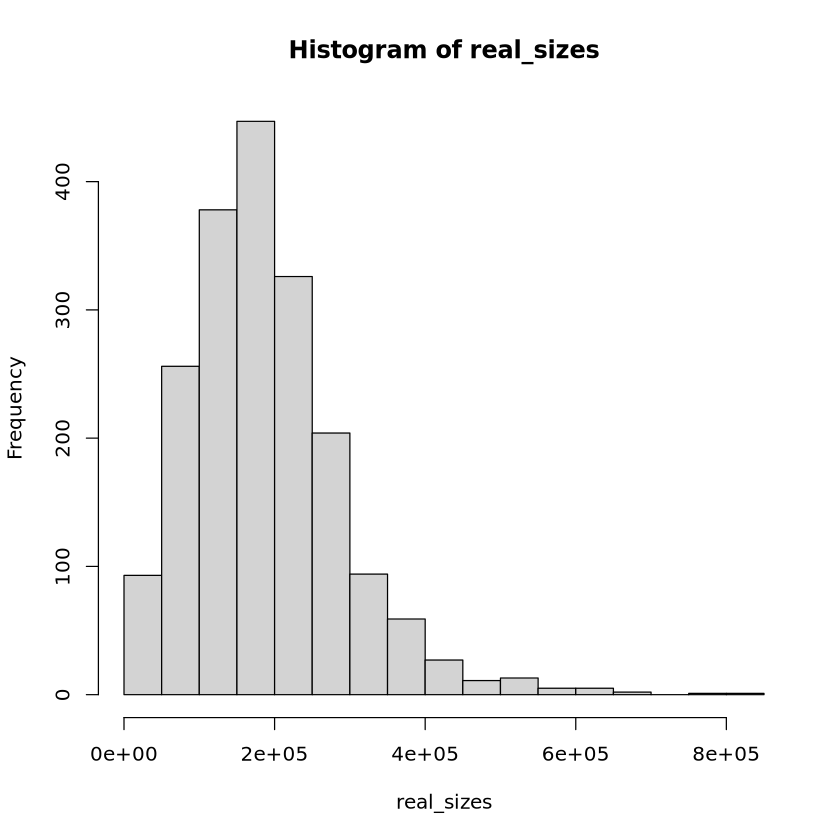

In [54]:
hist(real_sizes)

## Public CDR3 clones

In [1]:
library(data.table)
library(dplyr)


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:data.table’:

    between, first, last


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
cdr3 <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/cdr3_preprocessed_healthy_and_ibd.tsv')

In [4]:
head(cdr3)

patient_id,amino_acid,v_gene,j_gene,length_seq,unique_count,cum_expansion_freq
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
H0,CASSFSQGVNYGYTF,TCRBV12,TCRBJ01-02,15,1,0.005908518
H0,CASSLQGNTEAFF,TCRBV12-03,TCRBJ01-01,13,3,0.007299363
H0,CASSKCGYTF,TCRBV21-01,TCRBJ01-02,10,4,0.004450827
H0,CASSRVRINSPLHF,TCRBV27-01,TCRBJ01-06,14,1,0.004666577
H0,CSVPKPAATGELFF,TCRBV29-01,TCRBJ02-02,14,1,0.004532425
H0,CASRKLGGGNNEQFF,TCRBV12-02,TCRBJ02-01,15,1,0.003624403


In [2]:
phenotypes <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/phenotypes.tsv')
cdr3_summary <- merge(fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/summary_cdr3_dt.tsv'), 
    phenotypes, by = 'patient_id', all.x = TRUE)

In [ ]:
cdr3 <- merge(cdr3, phenotypes, by = 'patient_id', all.x = TRUE)
head(cdr3)

patient_id,amino_acid,v_gene,j_gene,length_seq,unique_count,cum_expansion_freq,group
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
H0,CASSFSQGVNYGYTF,TCRBV12,TCRBJ01-02,15,1,0.005908518,HC
H0,CASSLQGNTEAFF,TCRBV12-03,TCRBJ01-01,13,3,0.007299363,HC
H0,CASSKCGYTF,TCRBV21-01,TCRBJ01-02,10,4,0.004450827,HC
H0,CASSRVRINSPLHF,TCRBV27-01,TCRBJ01-06,14,1,0.004666577,HC
H0,CSVPKPAATGELFF,TCRBV29-01,TCRBJ02-02,14,1,0.004532425,HC
H0,CASRKLGGGNNEQFF,TCRBV12-02,TCRBJ02-01,15,1,0.003624403,HC


In [5]:
cdr3_sd <- cdr3_summary[, .(sd_rep_size = sd(total_number_of_seq)), by = .(group)]
cdr3_sd

group,sd_rep_size
<chr>,<dbl>
HC,91191.83
NA,NA
UC,162305.26
CD,139383.81


In [ ]:
public_cdr3 <- cdr3[, .(freq_hc = sum(group == 'HC')/772,
                        freq_cd = sum(group == 'CD')/896,
                        freq_uc = sum(group == 'UC')/305,
                        n_hc = sum(group == 'HC'),
                        n_cd = sum(group == 'CD'),
                        n_uc = sum(group == 'UC'),
                        n_total = .N), 
                    by = .(amino_acid, v_gene, j_gene)][n_total >= 2 ]
fwrite(public_cdr3, 
       '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/public_cdr3.tsv', 
       sep = '\t', quote = FALSE, row.names = FALSE)

In [4]:
public_cdr3 <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/public_cdr3.tsv')[n_total >= 300]

In [10]:
head(public_cdr3)

amino_acid,v_gene,j_gene,freq_hc,freq_cd,freq_uc,n_hc,n_cd,n_uc,n_total
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
CASSLQGNTEAFF,TCRBV12-03,TCRBJ01-01,0.5738342,0.4732143,0.4950820,443,424,151,1018
CASSLSGTGELFF,TCRBV07-03,TCRBJ02-02,0.1826425,0.1473214,0.1770492,141,132,54,327
CASSFGGNQPQHF,TCRBV27-01,TCRBJ01-05,0.3108808,0.2578125,0.2983607,240,231,91,562
CASSDSSTGELFF,TCRBV06-04,TCRBJ02-02,0.3691710,0.2589286,0.2524590,285,232,77,594
CASSDGTSGSNEQFF,TCRBV06-04,TCRBJ02-01,0.2707254,0.1997768,0.2065574,209,179,63,451
CASSYGTSTDTQYF,TCRBV06-02,TCRBJ02-03,0.4870466,0.3716518,0.3409836,376,333,104,813


In [38]:
#n_cdr3 <- unique(cdr3, by = c("amino_acid", "v_gene", "j_gene"))
n_public_cdr3 <- unique(public_cdr3[n_total > 200], by = c("amino_acid", "v_gene", "j_gene"))

In [39]:
nrow(n_public_cdr3)
nrow(n_cdr3)
nrow(n_public_cdr3) / nrow(n_cdr3) * 100

[1] 26662

[1] 217723265

[1] 0.01224582

In [ ]:
public_distr <- melt(table(public_cdr3$n_total))
head(public_distr)

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_col()`).”


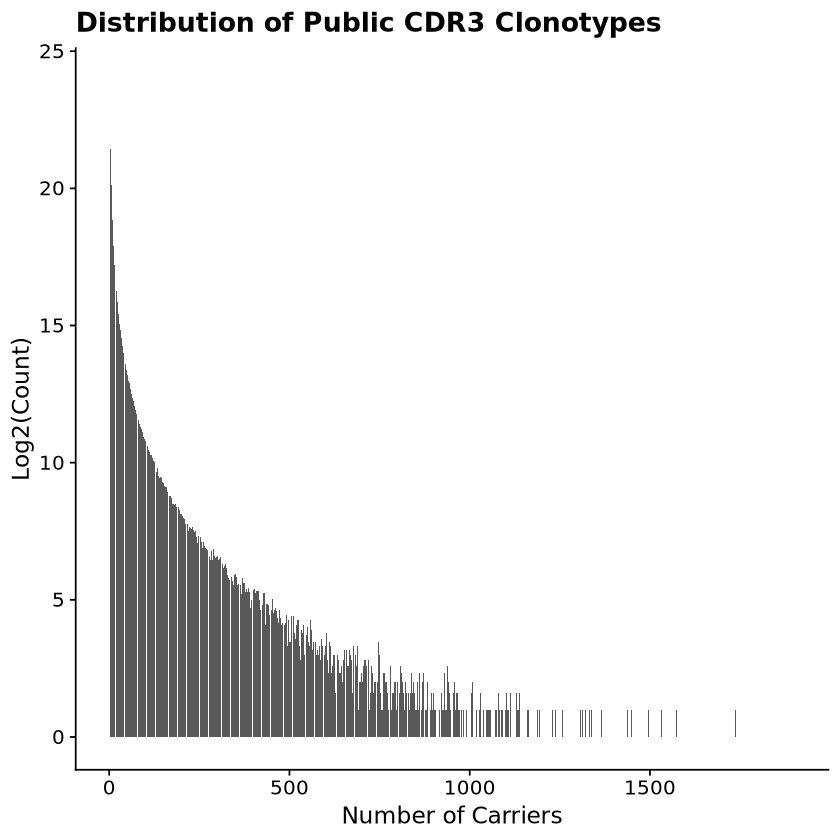

In [ ]:
public_pl <- ggplot(public_distr, aes(x = Var1, y = log2(value+1))) +
geom_col() +
scale_color_scico(palette = 'davos') +
  labs(title = 'Distribution of Public CDR3 Clonotypes',
       x = 'Number of Carriers',
       y = 'Log2(Count)') +
theme_cowplot()
public_pl


In [31]:
ggsave("healthy_and_ibd/plots/public_cdr3_distribution.pdf",
       public_pl, width = 8, height = 6, units = 'in', dpi = 600)

In [48]:
nrow(public_cdr3)
head(public_cdr3[n_total > 1700])

[1] 32169965

amino_acid,v_gene,j_gene,freq_hc,freq_cd,freq_uc,n_hc,n_cd,n_uc,n_total
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
CASSVGGNTEAFF,TCRBV09-01,TCRBJ01-01,0.9119171,0.8616071,0.8622951,704,772,263,1739
CASSPQETQYF,TCRBV18-01,TCRBJ02-05,0.9339378,0.8359375,0.8754098,721,749,267,1737


### Association between public clones and HLA genetics

In [3]:
hla <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/hla/hla_features.tsv')[
    gene %in% c('B', 'DRB1')][patient_id %in% cdr3_summary$patient_id]

hlas <- dcast(hla, patient_id ~ allele, value.var = 'homo_hetero', fun.aggregate = sum, fill = 0)

hla[hla == 1] <- "hetero"
hla[hla == 2] <- "homo"

In [9]:
public_cdr3s <- public_cdr3$amino_acid
rm(public_cdr3)

In [ ]:
public_cdr3_over_alleles <- merge(cdr3[amino_acid %in% public_cdr3s][, .(patient_id, amino_acid, v_gene, j_gene)], hlas, by = 'patient_id')
fwrite(public_cdr3_over_alleles,
    '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/public_cdr3_with_hla.tsv', 
       sep = '\t', quote = FALSE, row.names = FALSE)
rm(cdr3)

In [5]:
public_cdr3_over_alleles <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/public_cdr3_with_hla.tsv')

In [6]:
alleles_of_interest <- data.frame(n_car = colSums(hlas[,-1])) %>% filter(n_car>30) %>% rownames()
cols_to_select <- c("patient_id", "amino_acid", "v_gene", "j_gene", alleles_of_interest)
public_cdr3_over_alleles_of_interest <- public_cdr3_over_alleles[, ..cols_to_select]

In [50]:
fisher_results_dt <- data.table(matrix(ncol = 3, nrow = 0))
colnames(fisher_results_dt) <- c("clone", "allele", "p_val")
fwrite(fisher_results_dt, "/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/fisher_clone_hla.tsv", sep = '\t', quote = FALSE, row.names = FALSE)

In [ ]:
for (i in 11:nrow(public_cdr3)) { # from 11th because at some point the script crushed and I continue from there
    public_clone <-public_cdr3[i, .(amino_acid, v_gene, j_gene)]
    test <- public_cdr3_over_alleles_of_interest[public_clone, on = .(amino_acid, v_gene, j_gene)]
    test[test == 0] <- "absent"
    test[test == 1] <- "hetero"
    test[test == 2] <- "homo"
    fisher_results_dt <- data.table(matrix(ncol = 3, nrow = 0))
    colnames(fisher_results_dt) <- c("clone", "allele", "p_val") # Reset the data table for each clone
    
    for (al in alleles_of_interest){
        
        y <- data.table(table(hla[allele == al]$homo_hetero))
        y <- rbind(y, list(V1 = "absent", N = 1973 - sum(y$N)))
        
        clone_present <- data.table(table(test[[al]]))
        colnames(clone_present) <- c("V1", "Clone_present")
        
        clone_absent_homo <- y[V1=="homo"]$N - clone_present[V1=="homo"]$Clone_present
        clone_absent_hetero <- y[V1=="hetero"]$N - clone_present[V1=="hetero"]$Clone_present
        clone_absent_absent <- y[V1=="absent"]$N - clone_present[V1=="absent"]$Clone_present
        
        clone_absent <- data.table(data.frame(Clone_absent = c("homo" = clone_absent_homo, "hetero" = clone_absent_hetero, "absent" = clone_absent_absent )), 
            keep.rownames = TRUE )
        contingency_dt <- transpose(merge(clone_present, clone_absent, by.x = "V1", by.y = "rn"), make.names = "V1", keep.names = "Allele")

        clone_allele_matrix <-as.matrix(contingency_dt[,-1], nrow = 2)
        
        fisher_res <- tryCatch({
            fisher.test(clone_allele_matrix, simulate.p.value = TRUE, B = 9999)
        }, error = function(e) NULL)
        fisher_results_dt_pair <- tryCatch({
            data.table(clone = paste0(public_clone, collapse="_"), allele = al, p_val = fisher_res$p.value)
        }, error = function(e) NULL)

        fisher_results_dt <- tryCatch({
            rbind(fisher_results_dt, fisher_results_dt_pair, fill = TRUE)
        }, error = function(e) fisher_results_dt) 

        }
        fwrite(fisher_results_dt, "/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/fisher_clone_hla.tsv", sep = '\t', quote = FALSE, row.names = FALSE, append = TRUE)
}

In [ ]:
fisher_results_dt, "/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/fisher_clone_hla.tsv"

In [15]:
collapsed_public_cdr3_over_allele <- public_cdr3_over_alleles[, lapply(.SD, sum), 
    by = .(amino_acid, v_gene, j_gene), .SDcols = !c("patient_id")]
fwrite(collapsed_public_cdr3_over_allele,
    '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/collapsed_public_cdr3_with_hla.tsv', 
       sep = '\t', quote = FALSE, row.names = FALSE)

In [23]:
head(collapsed_public_cdr3_over_allele)

amino_acid,v_gene,j_gene,B*07:02,B*07:05,B*08:01,B*13:02,B*14:01,B*14:02,B*15:01,⋯,DRB1*13:02,DRB1*13:03,DRB1*14:01,DRB1*14:03,DRB1*14:04,DRB1*14:07,DRB1*15:01,DRB1*15:02,DRB1*16:01,DRB1*16:02
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CASSFSQGVNYGYTF,TCRBV12,TCRBJ01-02,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,3,0,0,0
CASSLQGNTEAFF,TCRBV12-03,TCRBJ01-01,286,2,217,95,6,36,159,⋯,90,34,52,3,1,0,309,16,47,7
CASSKCGYTF,TCRBV21-01,TCRBJ01-02,2,0,0,1,0,0,1,⋯,0,0,0,0,0,0,4,0,0,0
CASSTLSGEAFF,TCRBV12-03,TCRBJ01-01,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,2,0,0,0
CSAVEYTEAFF,TCRBV29-01,TCRBJ01-01,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,2,0,0,0
CASSLPGANVLTF,TCRBV07-02,TCRBJ02-06,51,0,27,6,0,6,20,⋯,15,6,8,1,0,0,55,2,3,1


In [78]:
sum(collapsed_public_cdr3_over_allele[2, 4:93]) - collapsed_public_cdr3_over_allele[[2, 6]] #

ERROR: Error: Objekt 'collapsed_public_cdr3_over_allele' nicht gefunden
